<font color='#006400' size=6 align='center'><p style='text-align: center;'>**Cuaderno final de Análisis y Tratamiento de Datos en Química**\
<font color=#8B2500 size=5><p style='text-align: center;'>**Johan Camilo Pinto Lache - 2180096**\
<font color=#8B2500 size=5><p style='text-align: center;'>**Universidad Industrial de Santander**

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as scs
import matplotlib.pyplot as plt
import scipy as sio
import sklearn.metrics as skm
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
import scipy.io
from scipy import stats
from scipy.signal import savgol_filter
%matplotlib inline

## <font color=#8B2500 size=5> Primer ejercicio

In [2]:
Datos = pd.read_excel('./Datos/Datos-azul-timol.xlsx')

In [3]:
Datos

,Azul de timol (596 nm),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Espectro UV-Vis,Unnamed: 8
0,Muestra,Absorbancia,Muestra,Absorbancia,Muestra,Absorbancia,[Molar],Longitud de onda,Absorbancia
1,Blanco,0.002,Blanco,0.002,Blanco,0.002,0,400,0.126
2,Patrón 1,0.1,Patrón 1,0.09,Patrón 1,0.089,0.000003,400.5,0.125
3,Blanco,0,Blanco,0,Blanco,-0.001,0,401,0.122
4,Patrón 2,0.276,Patrón 2,0.267,Patrón 2,0.267,0.00001,401.5,0.121
...,...,...,...,...,...,...,...,...,...
797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,798,-0.004
798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,798.5,-0.004
799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,799,-0.004
800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,799.5,-0.004


In [4]:
DatosCurva = Datos.drop(['Unnamed: 2', 'Unnamed: 4', 'Espectro UV-Vis', 'Unnamed: 8'], axis=1)
DatosCurva1 = DatosCurva.drop([0, 3, 5, 7, 9, 11, 13, 15, 17], axis=0)
DatosCurva2 = DatosCurva1.set_axis(['Muestra', 'Absorbancia 1', 'Absorbancia 2', 'Absorbancia 3', 'Concentración [Molar]'], axis='columns')
DatosCurvaF1 = DatosCurva2[['Muestra', 'Absorbancia 1', 'Absorbancia 2', 'Absorbancia 3', 'Concentración [Molar]']][0:10]
DatosCurvaF2 = DatosCurvaF1.reset_index()
DatosCurvaF = DatosCurvaF2.drop(['index'], axis=1)
DatosCurvaF

,Muestra,Absorbancia 1,Absorbancia 2,Absorbancia 3,Concentración [Molar]
0,Blanco,0.002,0.002,0.002,0
1,Patrón 1,0.1,0.09,0.089,0.000003
2,Patrón 2,0.276,0.267,0.267,0.00001
3,Patrón 3,0.484,0.482,0.483,0.000017
4,Patrón 4,0.674,0.66,0.659,0.000024
5,Patrón 5,0.877,0.877,0.877,0.000031
6,Patrón 6,1.042,1.04,1.04,0.000038
7,Patrón 7,1.267,1.267,1.266,0.000045
8,Patrón 8,1.479,1.478,1.477,0.000052
9,Patrón 9,1.644,1.64,1.688,0.000059


In [5]:
DatosCurvaF['Promedio'] = DatosCurvaF[['Absorbancia 1', 'Absorbancia 2', 'Absorbancia 3']].mean(axis=1)
DatosCurvaFin = DatosCurvaF.drop(['Absorbancia 1', 'Absorbancia 2', 'Absorbancia 3'], axis=1)
DatosCurvaFin

,Muestra,Concentración [Molar],Promedio
0,Blanco,0,0.002000
1,Patrón 1,0.000003,0.093000
2,Patrón 2,0.00001,0.270000
3,Patrón 3,0.000017,0.483000
4,Patrón 4,0.000024,0.664333
5,Patrón 5,0.000031,0.877000
6,Patrón 6,0.000038,1.040667
7,Patrón 7,0.000045,1.266667
8,Patrón 8,0.000052,1.478000
9,Patrón 9,0.000059,1.657333


In [6]:
x = DatosCurvaFin[['Concentración [Molar]']] 
y = DatosCurvaFin[['Promedio']]
reg = linear_model.LinearRegression()
reg.fit(x, y)
y_pred = reg.predict(x)
m=reg.coef_[0]
b=reg.intercept_[0]
mse=skm.mean_squared_error(y, y_pred)
r2=skm.r2_score(y, y_pred)

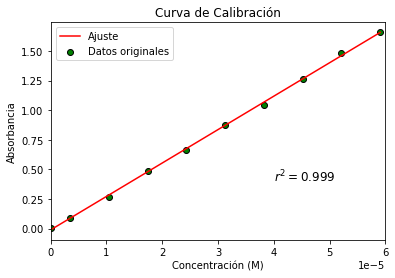

In [7]:
fig, ax= plt.subplots()
ax.scatter(x, y, color='green', label='Datos originales', edgecolors='black')
ax.plot(np.array(x), np.array(y_pred), color='red', label='Ajuste')
ax.legend()
ax.set_title("Curva de Calibración")
ax.set_xlabel("Concentración (M)")
ax.set_ylabel("Absorbancia")
ax.set_xlim(9e-19, 0.00006)
ax.text(0.00004,0.4, r"$r^2 = "+str("{0:.3f}".format(r2))+r"$", fontsize=12, color="black")
plt.show()

In [8]:
DatosCurvaFin['Desviación'] = DatosCurvaF[['Absorbancia 1', 'Absorbancia 2', 'Absorbancia 3']].std(axis=1)
YError = DatosCurvaFin['Desviación']
DatosCurvaFin.reset_index(drop=True, inplace=True)
DatosCurvaFin

,Muestra,Concentración [Molar],Promedio,Desviación
0,Blanco,0,0.002000,0.000000e+00
1,Patrón 1,0.000003,0.093000,6.082763e-03
2,Patrón 2,0.00001,0.270000,5.196152e-03
3,Patrón 3,0.000017,0.483000,1.000000e-03
4,Patrón 4,0.000024,0.664333,8.386497e-03
5,Patrón 5,0.000031,0.877000,1.359740e-16
6,Patrón 6,0.000038,1.040667,1.154701e-03
7,Patrón 7,0.000045,1.266667,5.773503e-04
8,Patrón 8,0.000052,1.478000,1.000000e-03
9,Patrón 9,0.000059,1.657333,2.663331e-02


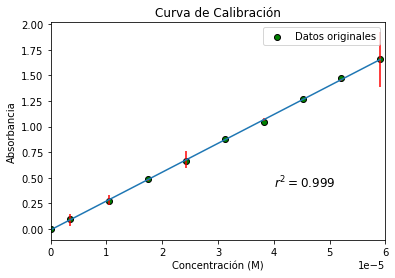

In [9]:
fig, ax= plt.subplots()
ax.scatter(x, y, color='green', label='Datos originales', edgecolors='black')
ax.set_xlim(9e-19, 0.00006)
ax.errorbar(np.array(x), np.array(y_pred), yerr=10*np.array(YError), ecolor='red')
ax.legend()
ax.set_title("Curva de Calibración")
ax.set_xlabel("Concentración (M)")
ax.set_ylabel("Absorbancia")
ax.text(0.00004,0.4, r"$r^2 = "+str("{0:.3f}".format(r2))+r"$", fontsize=12, color="black")
plt.show()

## <font color=#8B2500 size=5> Segundo ejercicio

In [10]:
Datos2_1 = pd.read_excel('./Datos/ASCI_IR.xlsx')
Datos2_2 = pd.read_excel('./Datos/Informacion Crudos20.xlsx')

In [11]:
Datos2_1.shape, Datos2_2.shape

((7468, 82), (84, 12))

In [60]:
DatosEspecIN = Datos2_1.T
DatosEspecRES1 = DatosEspecIN[0:59]
DatosEspecASFAL1 = DatosEspecIN[0:60]
DatosEspecRES = np.array(DatosEspecRES1)
DatosEspecASFAL = np.array(DatosEspecASFAL1)

DatosPropIn = Datos2_2
DatosPropIN2 = DatosPropIn.set_axis(['N Muestra', ' Descripción de la muestra', 'Sample ID', 'N de espectro', 'ASCI', 'IN (ASCI)', 'API', 'Azufre (%w)', 'Saturados (%w)', 'Aromáticos (%w)', 'Resinas (%w)', 'Asfaltenos (%w)'], axis='columns')
DatosProp = DatosPropIN2.drop([0, 83], axis=0)
DatosPropASFALIN = DatosProp[['Asfaltenos (%w)']]
DatosPropASFAL1 = DatosPropASFALIN.dropna()
DatosPropASFAL2 = DatosPropASFAL1.reset_index(drop=True)
DatosPropASFAL = np.array(DatosPropASFAL2)
DatosPropRESIN = DatosProp[['Resinas (%w)']]
DatosPropRES1 = DatosPropRESIN.dropna()
DatosPropRES2 = DatosPropRES1.reset_index(drop=True)
DatosPropRES = np.array(DatosPropRES2)

DatosPropRES.shape, DatosPropASFAL.shape, DatosEspecRES.shape, DatosEspecASFAL.shape

((59, 1), (60, 1), (59, 7468), (60, 7468))

## <font color=blue size=3> Modelo para Resinas

In [61]:
scaler=StandardScaler()
norma=Normalizer()

scaler.fit(DatosEspecRES)
x_scaled = scaler.transform(DatosEspecRES)
x_norm = preprocessing.normalize(DatosEspecRES, norm='l1')

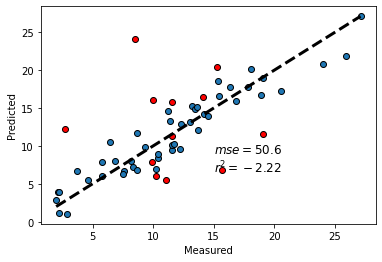

MSE = 50.6


In [84]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, DatosPropRES, train_size=0.8, random_state=4, shuffle= True)

pls = PLSRegression(n_components=10)
pls.fit(x_train, y_train)

y_pred = pls.predict(x_train)
y_pred_test = pls.predict(x_test)
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(15,9, r"$mse = "+str(round(mean_squared_error(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.text(15,6.5, r"$r^2 = "+str(round(r2_score(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print('MSE = ' + str(round(mean_squared_error(y_test, y_pred_test), 2)))

In [63]:
def optimise_pls(X, y, xt, n_comp):
    

    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_pred1 = pls.predict(X)
    y_pred2 = pls.predict(xt)
    r2 = r2_score(y, y_pred1)
    mse = mean_squared_error(y, y_pred1)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_pred1, y_pred2, r2, mse, rpd)

In [64]:
r2s = []
mses = []
rpds = []
yp1 = []
yp2 = []
arr_comp = np.arange(1, 31)
for n_comp in arr_comp:
    y_pred1, y_pred2, r2, mse, rpd = optimise_pls(x_train, y_train, x_test, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)
    yp1.append(y_pred1)
    yp2.append(y_pred2)

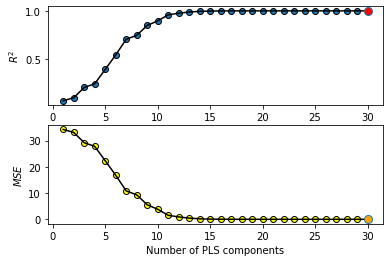

In [65]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(arr_comp, r2s, edgecolors=(0, 0, 0))
ax1.plot(arr_comp, r2s, 'k-')
ax1.plot(arr_comp[np.argmax(r2s)], np.array(r2s)[np.argmax(r2s)], 'o', ms=8, mfc='red')
ax1.set_xlabel('Number of PLS components')
ax1.set_ylabel('$R^2$')

ax2.scatter(arr_comp, mses, color='yellow', edgecolors=(0, 0, 0))
ax2.plot(arr_comp, mses, 'k-')
ax2.plot(arr_comp[np.argmin(mses)], np.array(mses)[np.argmin(mses)], 'o', ms=8, mfc='orange')
ax2.set_xlabel('Number of PLS components')
ax2.set_ylabel('$MSE$')
plt.show()

In [66]:
r2s1 = []
mses1 = []
rpds1 = []
yp11 = []
yp21 = []
rs1 = np.arange(1, 101)
for rs11 in rs1:
    x_train1, x_test1, y_train1, y_test1 = train_test_split(x_norm, DatosPropRES, train_size=0.8, random_state=rs11, shuffle=True)
    y_pred11, y_pred21, r21, mse1, rpd1 = optimise_pls(x_train1, y_train1, x_test1, 10)
    r2s1.append(r21)
    mses1.append(mse1)
    rpds1.append(rpd1)
    yp11.append(y_pred11)
    yp21.append(y_pred21)

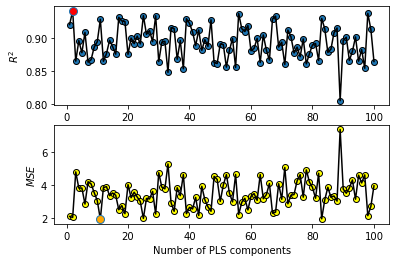

In [67]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(rs1, r2s1, edgecolors=(0, 0, 0))
ax1.plot(rs1, r2s1, 'k-')
ax1.plot(rs1[np.argmax(r2s1)], np.array(r2s1)[np.argmax(r2s1)], 'o', ms=8, mfc='red')
ax1.set_xlabel('Number of PLS components')
ax1.set_ylabel('$R^2$')

ax2.scatter(rs1, mses1, color='yellow', edgecolors=(0, 0, 0))
ax2.plot(rs1, mses1, 'k-')
ax2.plot(rs1[np.argmin(mses1)], np.array(mses1)[np.argmin(mses1)], 'o', ms=8, mfc='orange')
ax2.set_xlabel('Number of PLS components')
ax2.set_ylabel('$MSE$')
plt.show()

## <font color=black size=3> K-Fold para modelo 

In [68]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
kf = KFold(n_splits=5, shuffle=True, random_state=30)
model=PLSRegression(n_components=10)
x_traint = []
x_testt = [] 
y_traint = []
y_testt = []
r2s = []
mses = []

i = 1
for train_index1, test_index1 in kf.split(x_norm):
    x_train = x_norm[train_index1]
    x_test = x_norm[test_index1]
    y_train = DatosPropRES[train_index1]
    y_test = DatosPropRES[test_index1]
    model.fit(x_train, y_train)
    mse = mean_squared_error(y_test, model.predict(x_test))
    r2= r2_score(y_test, model.predict(x_test))
    
    x_traint.append(x_train) 
    x_testt.append(x_test)
    y_traint.append(y_train)
    y_testt.append(y_test)
    r2s.append(r2)
    mses.append(mse)
   
    model.fit(x_train1, y_train1)
    print(f"MSE. {i} on the test set: {mean_squared_error(y_test, model.predict(x_test))}")
    print(f"R2. {i} on the test set: {r2_score(y_test1, model.predict(x_test1))}")
    i += 1

MSE. 1 on the test set: 10.002202154543514
R2. 1 on the test set: -0.4435964701916797
MSE. 2 on the test set: 4.66629152148177
R2. 2 on the test set: -0.4435964701916797
MSE. 3 on the test set: 4.4410697623284365
R2. 3 on the test set: -0.4435964701916797
MSE. 4 on the test set: 24.277304255708234
R2. 4 on the test set: -0.4435964701916797
MSE. 5 on the test set: 31.73848107665508
R2. 5 on the test set: -0.4435964701916797


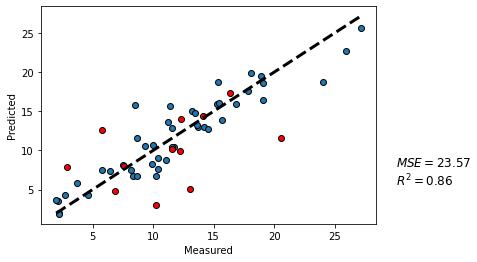

In [77]:
y_tr=np.array(y_traint[r2s.index(max(r2s))]) # Escogemos el mejor set a partir del que presente el
y_te=np.array(y_testt[r2s.index(max(r2s))]) # el valor máximo de r2. Podríamos también elegir el que
X_tr=np.array(x_traint[r2s.index(max(r2s))]) # presente el menor valor del mse
X_te=np.array(x_testt[r2s.index(max(r2s))])
model.fit(X_tr, y_tr) # Ejecutamos el modelo PLS con el set de entranamiento de mejor comportamiento

Y_pred = model.predict(X_tr) # Con el modelo predicmos los valos de la propiedad
Y_pred_test = model.predict(X_te) # Evaluamos las muestras de prueba

fig, ax = plt.subplots()
ax.scatter(y_tr, Y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_te, Y_pred_test, color='red', label='test set', edgecolors=(0, 0, 0))
ax.plot([y_tr.min(), y_tr.max()], [y_tr.min(), y_tr.max()], 'k--', lw=3)
ax.text(30,8, r"$MSE = "+str("{0:.2f}".format(mean_squared_error(y_te, Y_pred_test)))+r"$", fontsize=12, color="black")
ax.text(30,5.5, r"$R^2 = "+str("{0:.2f}".format(r2_score(y_tr, Y_pred)))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## <font color=blue size=3> Modelo para Asfaltenos

In [69]:
scaler1=StandardScaler()
norma1=Normalizer()

scaler1.fit(DatosEspecASFAL)
x_scaled1 = scaler1.transform(DatosEspecASFAL)
x_norm1 = preprocessing.normalize(DatosEspecASFAL, norm='l1')

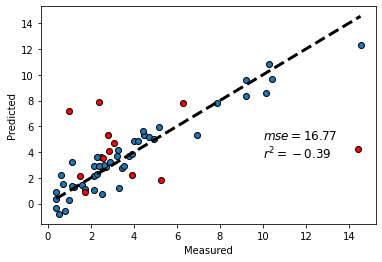

MSE = 16.77


In [70]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_norm1, DatosPropASFAL, train_size=0.8, random_state=4, shuffle= True)

pls = PLSRegression(n_components=10)
pls.fit(x_train3, y_train3)

y_pred3 = pls.predict(x_train3)
y_pred_test3 = pls.predict(x_test3)
fig, ax = plt.subplots()
ax.scatter(y_train3, y_pred3, edgecolors=(0, 0, 0))
ax.scatter(y_test3, y_pred_test3, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train3.min(), y_train3.max()], [y_train3.min(), y_train3.max()], 'k--', lw=3)
ax.text(10,5, r"$mse = "+str(round(mean_squared_error(y_test3, y_pred_test3), 2))+r"$", fontsize=12, color="black")
ax.text(10,3.5, r"$r^2 = "+str(round(r2_score(y_test3, y_pred_test3), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print('MSE = ' + str(round(mean_squared_error(y_test3, y_pred_test3), 2)))

In [71]:
def optimise_pls(X2, y2, xt2, n_comp3):
    

    pls = PLSRegression(n_components=n_comp3)
    pls.fit(X2, y2)
    y_pred12 = pls.predict(X2)
    y_pred22 = pls.predict(xt2)
    r22 = r2_score(y2, y_pred12)
    mse2 = mean_squared_error(y2, y_pred12)
    rpd2 = y2.std()/np.sqrt(mse2)
    
    return (y_pred12, y_pred22, r22, mse2, rpd2)

In [72]:
r2s2 = []
mses2 = []
rpds2 = []
yp12 = []
yp22 = []
arr_comp3 = np.arange(1, 31)
for n_comp3 in arr_comp3:
    y_pred12, y_pred22, r22, mse2, rpd2 = optimise_pls(x_train3, y_train3, x_test3, n_comp3)
    r2s2.append(r22)
    mses2.append(mse2)
    rpds2.append(rpd2)
    yp12.append(y_pred12)
    yp22.append(y_pred22)

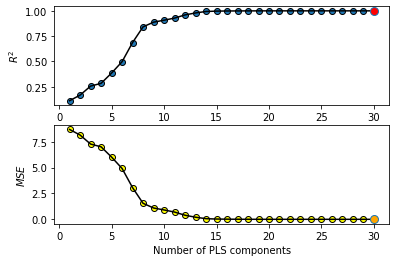

In [73]:
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.scatter(arr_comp3, r2s2, edgecolors=(0, 0, 0))
ax1.plot(arr_comp3, r2s2, 'k-')
ax1.plot(arr_comp3[np.argmax(r2s2)], np.array(r2s2)[np.argmax(r2s2)], 'o', ms=8, mfc='red')
ax1.set_xlabel('Number of PLS components')
ax1.set_ylabel('$R^2$')

ax2.scatter(arr_comp3, mses2, color='yellow', edgecolors=(0, 0, 0))
ax2.plot(arr_comp3, mses2, 'k-')
ax2.plot(arr_comp3[np.argmin(mses2)], np.array(mses2)[np.argmin(mses2)], 'o', ms=8, mfc='orange')
ax2.set_xlabel('Number of PLS components')
ax2.set_ylabel('$MSE$')
plt.show()

In [74]:
r2s3 = []
mses3 = []
rpds3 = []
yp13 = []
yp23 = []
rs2 = np.arange(1, 101)
for rs12 in rs2:
    x_train4, x_test4, y_train4, y_test4 = train_test_split(x_norm1, DatosPropASFAL, train_size=0.8, random_state=rs12, shuffle=True)
    y_pred13, y_pred23, r23, mse3, rpd3 = optimise_pls(x_train4, y_train4, x_test4, 10)
    r2s3.append(r23)
    mses3.append(mse3)
    rpds3.append(rpd3)
    yp13.append(y_pred13)
    yp23.append(y_pred23)

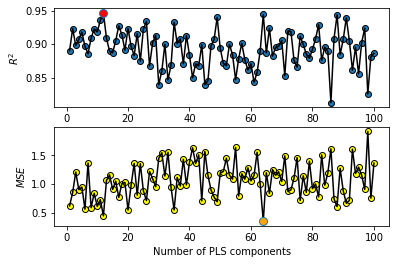

In [75]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(rs2, r2s3, edgecolors=(0, 0, 0))
ax1.plot(rs2, r2s3, 'k-')
ax1.plot(rs2[np.argmax(r2s3)], np.array(r2s3)[np.argmax(r2s3)], 'o', ms=8, mfc='red')
ax1.set_xlabel('Number of PLS components')
ax1.set_ylabel('$R^2$')

ax2.scatter(rs2, mses3, color='yellow', edgecolors=(0, 0, 0))
ax2.plot(rs2, mses3, 'k-')
ax2.plot(rs2[np.argmin(mses3)], np.array(mses3)[np.argmin(mses3)], 'o', ms=8, mfc='orange')
ax2.set_xlabel('Number of PLS components')
ax2.set_ylabel('$MSE$')
plt.show()

## <font color=black size=3> K-Fold para modelo 

In [78]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
kf1 = KFold(n_splits=5, shuffle=True, random_state=20)
model=PLSRegression(n_components=10) 
x_traint1 = []
x_testt1 = [] 
y_traint1 = []
y_testt1 = []
r2s1 = []
mses1 = []

i = 1
for train_index2, test_index2 in kf1.split(x_norm1):
    x_train1 = x_norm1[train_index2]
    x_test1 = x_norm1[test_index2]
    y_train1 = DatosPropASFAL[train_index2]
    y_test1 = DatosPropASFAL[test_index2]
    model.fit(x_train1, y_train1) #Training the model
    mse1 = mean_squared_error(y_test1, model.predict(x_test1))
    r21= r2_score(y_test1, model.predict(x_test1))
    
    # Almacenamos cada grupo en los arreglos creados
    x_traint1.append(x_train1) 
    x_testt1.append(x_test1)
    y_traint1.append(y_train1)
    y_testt1.append(y_test1)
    r2s1.append(r21)
    mses1.append(mse1)
   
    # Entrenamos el modelo para cada separación the model
    model.fit(x_train1, y_train1) #Training the model
    print(f"MSE. {i} on the test set: {mean_squared_error(y_test1, model.predict(x_test1))}")
    print(f"R2. {i} on the test set: {r2_score(y_test1, model.predict(x_test1))}")
    i += 1

MSE. 1 on the test set: 23.10103968403959
R2. 1 on the test set: -0.05335485245184235
MSE. 2 on the test set: 4.759269658080226
R2. 2 on the test set: -0.6751654994639706
MSE. 3 on the test set: 10.203553391258168
R2. 3 on the test set: 0.06769959268499559
MSE. 4 on the test set: 26.6712664227323
R2. 4 on the test set: -2.228818120830332
MSE. 5 on the test set: 22.99652473608803
R2. 5 on the test set: -3.6694636383843307


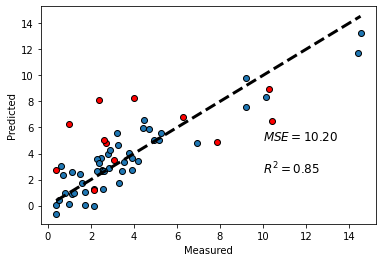

In [82]:
y_tr1=np.array(y_traint1[r2s1.index(max(r2s1))])
y_te1=np.array(y_testt1[r2s1.index(max(r2s1))])
X_tr1=np.array(x_traint1[r2s1.index(max(r2s1))])
X_te1=np.array(x_testt1[r2s1.index(max(r2s1))])
model.fit(X_tr1, y_tr1)

Y_pred1 = model.predict(X_tr1)
Y_pred_test1 = model.predict(X_te1)

fig, ax = plt.subplots()
ax.scatter(y_tr1, Y_pred1, edgecolors=(0, 0, 0))
ax.scatter(y_te1, Y_pred_test1, color='red', label='test set', edgecolors=(0, 0, 0))
ax.plot([y_tr1.min(), y_tr1.max()], [y_tr1.min(), y_tr1.max()], 'k--', lw=3)
ax.text(10,5, r"$MSE = "+str("{0:.2f}".format(mean_squared_error(y_te1, Y_pred_test1)))+r"$", fontsize=12, color="black")
ax.text(10,2.5, r"$R^2 = "+str("{0:.2f}".format(r2_score(y_tr1, Y_pred1)))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()